## ME 6103 - Optimization: Homework Project #2
### By: Justin Mitchell
#### Due: 23 September 2020 @ 11:59 PM
<img src="mouse.png" width="350"/>

This document was created using Jupyter, with Python and Markdown. 

<a id='0'></a>
## Table of Contents

This table of contents and document utilize live links for your convenience.

- [Model](#1)
    - [Compromise Decision Support Problem Formulation](#1a)
    - [Assumptions Made](#1b)
    - [Analytical Relationships](#1c)
    - [Application of Principles of Modeling](#1d)
    - [Model Validation](#1e)
- [Solution](#2)
    - [Solution Technique](#2a)
    - [Program](#2b)
        - [Initializations](#Inits)
        - [Helper Functions](#Helps)
        - [Main Program](#Main)
    - [Flow Chart of Program](#2c)
- [Results Discussion](#3)
    - [Results and Initial Assessment ](#3a)
    - [Validation of Results](#3c)
    - [Conclusions and Product Recomendations](#3d)
    - [Recommendations for Future Work](#3e)
    - [Discussion of Learning Experiences](#3f)
- [References](#Refs)

<a id='1'></a>
## Model

<a id='1a'></a>
### Compromise Decision Support Problem Formulation

#### Given

$l_1 =$ $1\frac{1}{2}$" = 38 mm, $l_2 =$ $\frac{1}{2}\left(3\frac{5}{16}\right)$" = 42 mm

$r =$ $3\frac{5}{16}$" = 84 mm, $\theta =$ $\pi =$ 180$^{\circ}$

$E =$ 210 Gpa [[1]](#Ref2), $\sigma_y =$ 2000 MPa [[1]](#Ref2)

#### Find
##### System Variables

They determine the relevant information about the design:

$N$: Numer of coils  

$d$: Spring wire diameter

$D$: Mean coil diameter  

##### Deviation Variables

They determine the deviation of the goals from their associated target values:

$d_{c}^+$: Represents deviation above cost goal

$d_{c}^-$: Represents deviation below cost goal

$d_{Esc}^+$: Represents deviation above energy storage capacity goal

$d_{Esc}^-$: Represents deviation below energy storage capacity goal

$d_{Se}^+$: Represents deviation above space efficiency goal

$d_{Se}^-$: Represents deviation below space efficiency goal


#### Satisfy

##### System Constraints

The physical constraints are:

$\sigma_y - \sigma > 0$

$50 \leq F \leq 60$

The geometrical constraints are:

$D - d \geq D_m$ (= 2.5 mm)

##### System Goals

Meet (low) cost target:

$c + d_{c}^- - d_{c}^+ = T_c$

Meet (high) target value of energy storage capacity:

$\frac{\sigma^2}{8E} + d_{Esc}^- - d_{Esc}^+ = T_{Esc}$

Meet (high) target value of space efficiency:

$\frac{\pi C}{(C+1)^2} + d_{Se}^- - d_{Se}^+ = T_{Se}$

##### Bounds

Based on the designer's judgement and the physical limitations:

$1 \leq N_b \leq 20$

0.03 mm $\leq d \leq$ 3.5mm

2.5 mm $\leq D \leq$ 10mm


#### Minimize

##### Case 1 - All goals have equal priority, Archimedean weighting scheme: $Z = d_{c}^+ + d_{Esc}^- + d_{Se}^-$

##### Case 2 - Cost is much more important than the other goals, lexicographic minimum method: $Z = \left[\begin{array}{rc}\text{Cost} \\ \text{Energy storage capacity} \\ \text{Space efficiency} \end{array}\right]$

##### Case 3 - Cost has the lowest priority, lexicographic minimum method: $Z = \left[\begin{array}{rc}\text{Energy storage capacity} \\ \text{Space efficiency}\\ \text{Cost}  \end{array}\right]$


[Back to Table of Contents](#0)

# <a id='1b'></a>
### Assumptions Made

- That the general design of the mouse trap is not to be changed, only the springs.
- That the springs will be made from steel music wire, the most common material for torsion springs.
- That the material is homogenous. 
- Its response can be predicted closely by common engineering equations.
- That the lexicographic minimum method accurately reflects one goal being far more important than the others, because the manufacturer did not describe how much more important it is relative to the other goals.
- The number of turns in the spring is an integer value. 

[Back to Table of Contents](#0)

# <a id='1c'></a>
### Analytical Relationships

Energy storage capacity: $\boxed{\frac{\sigma^2}{8E}}$

$\sigma$: Bending stress, $E$: Young's modulus 

Space efficiency: $\boxed{\frac{\pi C}{(C+1)^2}}$ 

$C = D/d$ (Spring index)

$D$: Mean coil diameter, $d$: Spring wire diameter

#### Helical Coil Torsion Spring Equations [[2]](#Ref1) 

$\boxed{\sigma = K_i \left(\frac{32Fr}{\pi d^3}\right)}$

$K_i=\frac{4C^2-C-1}{4C(C-1)}$ (Stress concentration factor)

$M=Fr$ (Bending moment)

$\boxed{F=\frac{k\theta}{r}}$

$\theta$: Total angular deflection (in radians)

Spring rate: $\boxed{k = \frac{d^4E}{64DN_a}}$ (torque per radian)

$N_a = N_b + \frac{l_1+l_2}{3\pi D}$ (Number of active turns)

$N_b$: Number of turns in free spring body

$l_1$ and $l_2$: Spring leg lengths

#### Cost Equations 

$l = (\pi DN_b) +l_1+l_2$ (Total spring wire length) 

$V = \pi(d/2)^2l \rightarrow m = \rho V \rightarrow \boxed{c = mP}$

$m$: Mass (kg), $\rho$: Material density (kg/$m^3$), $P$: Current market price per unit (USD/kg), $c$: Cost per spring (USD)

[Back to Table of Contents](#0)

# <a id='1d'></a>
### Application of Principles of Modeling

This analysis abides by good modeling princples and practices. Firstly, the model is simple so that it does not overfit the problem. Using an exaustive search technique also insures that the problem has not been fit to the solution technique either. The solution will be validated such to insure that the program doesn't contain any bugs. Conclusions from the model should not be overextended. The model should not replace decision makers, however, it helps us learn and understand the problem so that we can paint a more-complete picture before making a key  design decision. 

[Back to Table of Contents](#0)

# <a id='1e'></a>
### Model Validation

In order to validate the solution to this problem, we'll utilize 2 main tools. First, are graphs. Because this optimization problem is one of only 3 dimensions, plots can be made to help us understand if the results seem reasonable for the entire search space. Second, we should compare our resultant parameters to simlar designs already existing in the market to determine if they're reasonable. 

[Back to Table of Contents](#0)

<a id='2'></a>
## Solution

<a id='2a'></a>
### Solution Technique

The following program solves the above problem using an exaustive search. For every number of turns in a free spring body ($N_b$), all spring wire diameters ($d$) will be searched; and for all spring wire diamters, all mean coil diameters ($D$) will be serached. 

[Back to Table of Contents](#0)

<a id='2b'></a>
### Program

<a id='Inits'></a>
#### Initializations 

In [1]:
# Necessary imports
import numpy as np

# Create search space
Nb_all = np.arange(20)+1 # Create all Nb values to search [turns]
d_all = (np.arange(50)/10+0.3)/1000 # Create all d values to search [m]
D_all = np.arange(start=2.6e-3, stop=10e-3, step=0.2e-3) # Create all D values to search [m]

# Initialize other variables for programming 
l1 = 38e-3 # Length of spring leg 1 [m]
l2 = 42e-3 # Length of spring leg 2 [m]
r = 84e-3 # Radius about which force is applied [m]
theta = np.pi # Total angle of sring deflection [rad.]
E = 210e9 # Young's modulus [Pa]
yieldStress = 2000e6 # Yield stress [Pa]
rho = 7800 # Music wire density [kg/m^3]
P = 0.52 # Market price [USD/kg]
Na_all = np.array([]) # For all Na values [turns]
k_all = np.array([]) # For all k values [Nm / turn]
F_all = np.array([]) # For all F values [N]
Ki_all = np.array([]) # For all Ki values [unitless]
sigma_all = np.array([]) # For all sigma values [Pa = N/m^2]
Esc_all = np.array([]) # For all Energy storage capacity values
Se_all = np.array([]) # For all Bending stress values [Pa = N/m^2]
cost_all = np.array([]) # For all spring cost values [USD]
archWeights = np.array([0.333, 0.333, 0.333]) # Weights for Archimedean minimization - equal weights
Nb_sample = np.array([]) # Data storage for plotting
d_sample = np.array([]) # Data storage for plotting
D_sample = np.array([]) # Data storage for plotting

[Back to Table of Contents](#0)

<a id='Helps'></a>
#### Helper Functions

##### Lexicographic Minimum 

In [2]:
# This helper function returns the lexicographic minimum vector of two input vectors 
# and its associated parameters 
def LexicoMin(Z1,Z2,X1,X2):
    notDoneYet = True
    i = 0
    while notDoneYet:
        if Z1[i] < Z2[i]:
            return Z1, X1
            notDoneYet = False
        elif Z2[i] < Z1[i]:
            return Z2, X2
            notDoneYet = False
        i = i + 1

##### Archimedean Minimum 

In [3]:
# This helper function returns the Archimedean minimum vector of two input vectors weighted by weight vector
# and its associated parameters 
def ArchimedeanMin(Z1,Z2,weights,X1,X2):
    Z1total = 0
    Z2total = 0
    for i in np.arange(np.size(Z1)):
        Z1total = Z1[i]*weights[i] + Z1total
        Z2total = Z2[i]*weights[i] + Z2total
    if Z1total < Z2total:
        return Z1, X1
    else:
        return Z2, X2

##### Other Helper Functions

In [4]:
# Calculate Na [turns]
def calculator_Na(Nb,D,l1,l2):
    num = l1 + l2
    denom = 3*np.pi*D
    return Nb+(num/denom)

In [5]:
# Calculate k [Nm / turn]
# d and D in [m], Na in [turns], E in [Pa]
def calculator_k(d,D,Na,E):
    num = d**4 * E
    denom = 64*D*Na
    return (num/denom)

In [6]:
# Calculate F [N]
# k in [Nm / turn], theta in [rad.], r in [m]
def calculator_F(k,theta,r):
    num = k * theta * (1/(2*np.pi)) # [Nm / turn]*[rad.]*[turn/rad.] = [Nm]
    denom = r # [m]
    return num/denom

In [7]:
# Calculate Ki [unitless]
# d and D in same units
def calculator_Ki(d,D):
    C = D/d
    num = 4*C*C - C -1
    denom = 4*C*(C-1)
    return num/denom

In [8]:
# Calculate sigma (Bending stress) [Pa]
# F in [N], r in [m], d in [m], Ki is [unitless]
def calculator_sigma(F,r,d,Ki):
    num = Ki*32*F*r
    denom = np.pi*d**3
    return num/denom

In [9]:
# Calculate Energy storage capacity [N/m^2 = Pa]
# sigma in [Pa], E in [Pa]
def calculator_Esc(sigma,E):
    num = sigma**2
    denom = 8*E
    return num/denom

In [10]:
# Calculate Space efficiency [unitless]
def calculator_Se(C):
    num = np.pi*C
    denom = (C+1)**2
    return num/denom

In [11]:
# Calculate spring's cost [USD]
# d and D in [m], Nb in [turns], l1 and l2 in [m], rho in [kg/m^3], P in [USD/kg]
def calculator_cost(d,D,Nb,l1,l2,rho,P):
    l = (np.pi*D*Nb)+l1+l2 # Total spring wire length
    V = np.pi*(d/2)**2*l # Spring wire volume
    m = rho*V # Spring wire mass
    return m*P 

[Back to Table of Contents](#0)

<a id='Main'></a>
#### Main Program

In [12]:
# Main program - nested loop to traverse parameter search space and do exaustive search
import timeit # Import for runtiming 
start = timeit.default_timer() # Start runtimer
Zo_Case1 = np.array([999999, 999999, 999999]) # init vector for first iteration
Xo_Case1 = np.array([999999, 999999, 999999]) # init vector for first iteration
Zo_Case2 = np.array([999999, 999999, 999999]) # init vector for first iteration
Xo_Case2 = np.array([999999, 999999, 999999]) # init vector for first iteration
Zo_Case3 = np.array([999999, 999999, 999999]) # init vector for first iteration
Xo_Case3 = np.array([999999, 999999, 999999]) # init vector for first iteration
for Nb in Nb_all:
    for d in d_all:
        for D in D_all:
            
            # Relevant parameters, calculated using helper funtions 
            Na = calculator_Na(Nb,D,l1,l2)
            k = calculator_k(d,D,Na,E)
            F = 2*calculator_F(k,theta,r)
            Ki = calculator_Ki(d*10000,D*10000) # *** Causing divide by zero warning for some reason
            sigma = calculator_sigma(F,r,d,Ki)
            Esc = calculator_Esc(sigma,E)
            Se = calculator_Se(D/d)
            cost = calculator_cost(d,D,Nb,l1,l2,rho,P)
            
            # Check constraints 
            constraintsOK = True # Assume okay until checked
            if yieldStress < sigma: # Yield check
                constraintsOK = False
            if F < 50 or F > 60: # Force requirement check 
                constraintsOK = False
            if D - d < 2.5e-3: # Check geometrical constraint - spring fit around mandrel 
                constraintsOK = False
            
            # Perform minimization process on parameter sets that do fall within constraints
            if constraintsOK:
                
                # Save useful data that I want
                F_all = np.append(F_all,F) # Force data
                cost_all = np.append(cost_all,cost) # Cost data
                Esc_all = np.append(Esc_all,Esc) # Energy storage capacity data
                Se_all = np.append(Se_all,Se) # Spacial efficiency data 
                Nb_sample = np.append(Nb_sample,Nb) # Save Nb of data point
                d_sample = np.append(d_sample, d) # Save d of data point
                D_sample = np.append(D_sample, D) # Save D of data point 
                
                # Calculate deviations/goals
                T_cost = 0.005 # Target cost 
                Z1_Case1 = -1*(T_cost-cost) # Minimize positive deviation
                T_Esc = 2.5e6 # Target energy storage capacity
                Z2_Case1 = T_Esc - Esc # Minimize neg. deviation
                T_Se = 0.75 # Target space efficiency 
                Z3_Case1 = T_Se - Se # Minimize neg. deviation
                Z_Case1 = np.array([Z1_Case1, Z2_Case1, Z3_Case1]) # Make vector of deviations for Archimedean
                X_Case1 = np.array([Nb, d, D]) # Make vector of parameters
                # Case 1 
                # Do Archimedean minimizaton (with equal weights) and store min 
                Zo_Case1, Xo_Case1 = ArchimedeanMin(Z_Case1,Zo_Case1,archWeights,X_Case1,Xo_Case1)
                Z_Case2 = np.array([cost, -1*Esc, -1*Se]) # Make vector for Lexico minimization of cost
                X_Case2 = np.array([Nb, d, D]) # Vector of parameters 
                # Case 2
                # Do Lexico minimization of cost 
                Zo_Case2, Xo_Case2 = LexicoMin(Z_Case2,Zo_Case2,X_Case2,Xo_Case2)
                Z_Case3 = np.array([-1*Esc, -1*Se, cost]) # Vecotr for Lexico min of neg. of energy cap. 
                X_Case3 = np.array([Nb, d, D]) # Associated parameters 
                # Case 3
                # Do Lexico minimization of negative of energy storage capacity
                Zo_Case3, Xo_Case3 = LexicoMin(Z_Case3,Zo_Case3,X_Case3,Xo_Case3) 
                
stop = timeit.default_timer() # Stop runtimer
print("Main program has finished running.")
print("Runtime: " + str(round(stop - start,2)) + " seconds") 

<ipython-input-7-4278d2166ddb>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return num/denom


Main program has finished running.
Runtime: 0.55 seconds


The main program completed quickly. Though a divide by zero warning arose due to the division of extremely small numbers, the program had no issues completing. 

[Back to Table of Contents](#0)

<a id='2c'></a>
### Flow Chart of Program

<img src="flow.jpeg" width="500"/>

[Back to Table of Contents](#0)

<a id='3'></a>
## Results Discussion 

<a id='3a'></a>
### Results and Initial Assessment 

In [13]:
print("Case 1 Results:\nNb: " + str(round(Xo_Case1[0],0)) + " turns\nd: " + str(round(Xo_Case1[1]*1000,1)) + " mm\nD: " + str(round(Xo_Case1[2]*1000,1))+" mm")
print("cost: " + str(round(Zo_Case1[0]+T_cost,3)) + " USD\nEnergy storage capacity: " + str(round(T_Esc-Zo_Case1[1],-3))+" Pa")
print("Using archimedean minimization with weights: "+str(archWeights)+" (equivalently weighted)") 

Case 1 Results:
Nb: 13.0 turns
d: 3.3 mm
D: 6.4 mm
cost: 0.012 USD
Energy storage capacity: 2377000.0 Pa
Using archimedean minimization with weights: [0.333 0.333 0.333] (equivalently weighted)


For the case of equivalently weight goals; cost, energy storage capacity, and space efficiency; the optimal spring would have 13 turns, a wire diameter of 3.3 mm, and a mean diameter of 6.4 mm. 

In [14]:
print("Case 2 Results:\nNb: " + str(round(Xo_Case2[0],0)) + " turns\nd: " + str(round(Xo_Case2[1]*1000,1)) + " mm\nD: " + str(round(Xo_Case2[2]*1000,1))+" mm")
print("cost: " + str(round(Zo_Case2[0],3)) + " USD\nEnergy storage capacity: " + str(round(-1*Zo_Case2[1],-3))+" Pa")

Case 2 Results:
Nb: 7.0 turns
d: 3.1 mm
D: 9.0 mm
cost: 0.009 USD
Energy storage capacity: 2275000.0 Pa


For the case of cost being the highest priorty, the optimal spring would have 7 turns, a wire diamter of 3.1 mm, and a mean diameter of 9.0 mm. It makes sense that decreasing the priority of energy storage would result in a spring with less overall mass to minimize the high priority, cost. 

In [15]:
print("Case 3 Results:\nNb: " + str(round(Xo_Case3[0],0)) + " turns\nd: " + str(round(Xo_Case3[1]*1000,1)) + " mm\nD: " + str(round(Xo_Case3[2]*1000,1))+" mm")
print("cost: " + str(round(Zo_Case3[2],3)) + " USD\nEnergy storage capacity: " + str(round(-1*Zo_Case3[0],-3))+" Pa")

Case 3 Results:
Nb: 13.0 turns
d: 3.3 mm
D: 6.4 mm
cost: 0.012 USD
Energy storage capacity: 2377000.0 Pa


For the case of energy storage capacity being the highest priority, the optimal spring would have 13 turns, a wire diameter of 3.3 mm, and a mean diameter of 6.4 mm. It is very important to note that this is the same optimal solution as that found for Case 1, for equivalent goal priorities. 

[Back to Table of Contents](#0)

<a id='3c'></a>
### Validation of Results

#### Conceptual Validation of Results

Victor-brand mouse traps have a single coil with about 26 turns. This hints that our result of 13 turns for each of our two mirror image coils might be rather accurate. From personal experience, the mean diameter of mouse trap coils are about half of a centimeter, so 3.1 mm wire coiled with a 6.4 mm mean diameter seems reasonable too.

This makes us question: if our result for Case 1/3 is so simlar to the competiton, why has the competition strayed away from the cheaper spring in Case 2? Perhaps the larger mean diameter of nearly one centimeter is too awkward to fit with the other mouse trap components. Perhaps we might need to redesign the other mouse trap components to make it fit. 

#### Graphical Validation of Results

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 85
plt.style.use('grayscale')

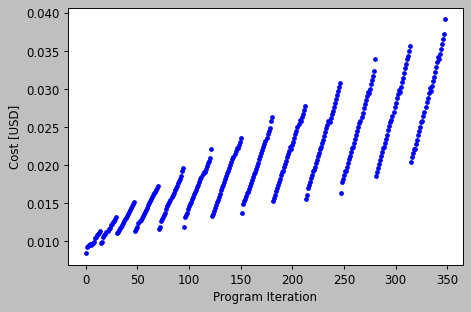

In [17]:
plt.plot(np.arange(np.size(cost_all)), cost_all, 'b.')
plt.ylabel('Cost [USD]')
plt.xlabel('Program Iteration')
plt.show()

This plot shows the cost associated with every spring that satisfied the problem constraints. The cost target of 0.005 USD was chosen for Case 1's Archimedean minimization, because it's slightly lower than the lowest costs displayed here. 

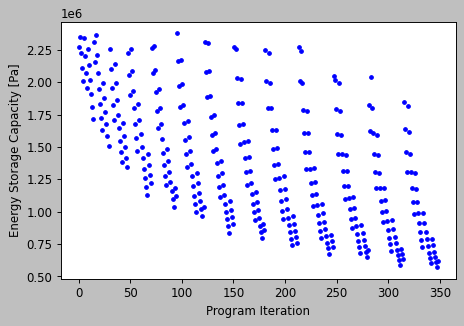

In [18]:
plt.plot(np.arange(np.size(Esc_all)), Esc_all, 'b.')
plt.ylabel('Energy Storage Capacity [Pa]')
plt.xlabel('Program Iteration')
plt.show()

This plot shows the energy storage capacity associated with every spring that satisfied the problem constraints. The energy storage capacity target of 2.5 MPa was chosen for Case 1's Archimedean minimization, because it's slightly higher than the highest values displayed here. 

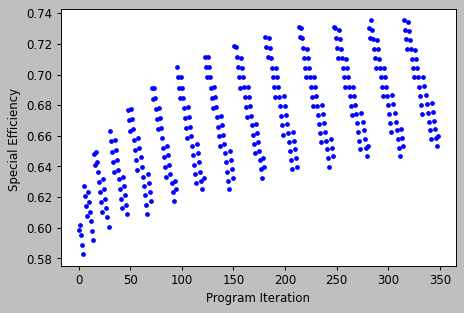

In [19]:
plt.plot(np.arange(np.size(Se_all)), Se_all, 'b.')
plt.ylabel('Special Efficiency ')
plt.xlabel('Program Iteration')
plt.show()

This plot shows the spacial efficiency associated with every spring that satisfied the problem constraints. The spacial efficiency target of 0.75 was chosen for Case 1's Archimedean minimization, because it's slightly higher than the highest values displayed here. 

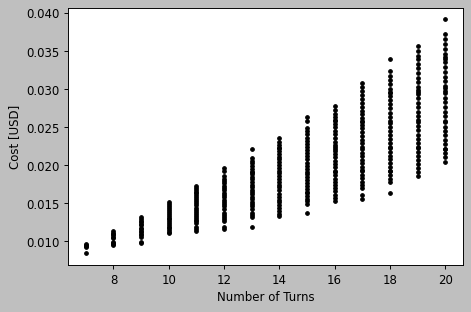

In [20]:
plt.plot(Nb_sample, cost_all,'k.')
plt.ylabel('Cost [USD]')
plt.xlabel('Number of Turns')
plt.show()

This plot shows the cost associated with every spring that satisfied the problem constraints as a function of its number of turns. It's clear why Case 2 drove the solution to 7 turns to achieve a minimum cost of 0.09 USD. It is important to note that the 13-turn spring solution to Case 1 and 3 is also low in cost relative to all of the springs that satisfy the problem constraints. 

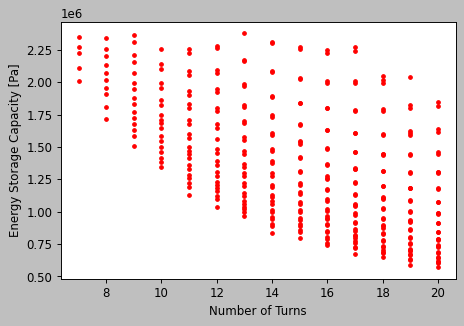

In [21]:
plt.plot(Nb_sample, Esc_all,'r.')
plt.ylabel('Energy Storage Capacity [Pa]')
plt.xlabel('Number of Turns')
plt.show()

This plot shows the energy storage capacity associated with every spring that satisfied the problem constraints as a function of its number of turns. It's clear why Case 3 drove the solution to 13 turns to a achieve a maximum energy storage capacity of 2.4 MPa. It's also evident that a 7-turn spring still has a very high energy storage capacity of 2.3 MPa. 

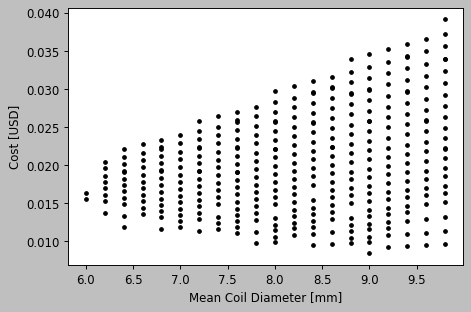

In [22]:
plt.plot(D_sample*1000, cost_all,'k.')
plt.ylabel('Cost [USD]')
plt.xlabel('Mean Coil Diameter [mm]')
plt.show()

This plot shows the cost of every spring that satisfied the problem constraints as a function of its mean coil diameter. It's obvious why Case 2 drove the mean coil diameter to 9.0 mm to minimize the cost of the spring. It's also evident that the 6.4 mm coil from Case 1 and 3 is still rather low-cost. 

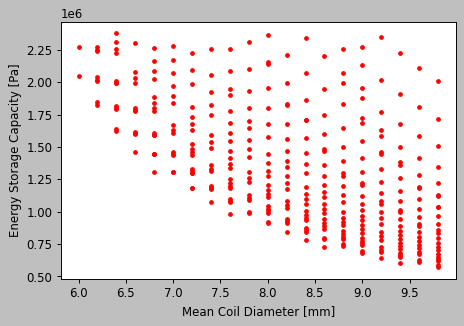

In [23]:
plt.plot(D_sample*1000, Esc_all,'r.')
plt.ylabel('Energy Storage Capacity [Pa]')
plt.xlabel('Mean Coil Diameter [mm]')
plt.show()

This plot diplays the energy storage capacity of every spring that satisfied the problem constraints as a function of its mean coil diameter. It's obvious why Case 3 drove the mean coil diameter to 6.4 mm to maximize the energy storage capacity of the coil to 2.4 MPa. It's also evident that the 9.0 mm coil from Case 2 still has a relatively high energy storage capacity of 2.3 MPa. 

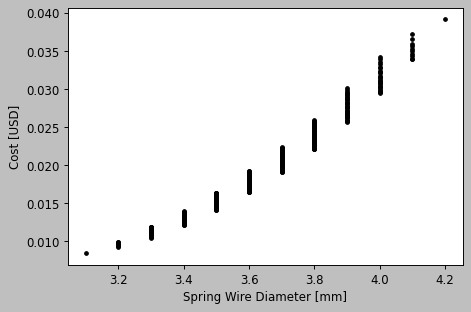

In [24]:
plt.plot(d_sample*1000, cost_all,'k.')
plt.ylabel('Cost [USD]')
plt.xlabel('Spring Wire Diameter [mm]')
plt.show()

This plot shows the cost of every spring that satisfied the problem constraints as a function of its spring wire diameter. It's obvious why Case 2 drove the spring wire diameter to 3.1 mm to minimize cost. It's also notable that the 3.3 mm wire from Case 1 and 3 is relatively low-cost. 

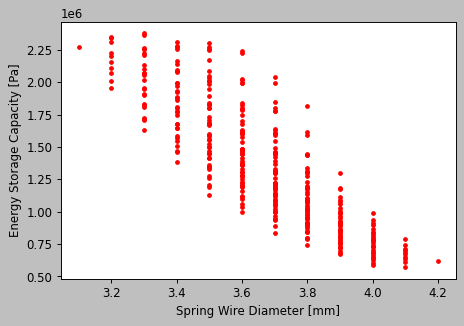

In [25]:
plt.plot(d_sample*1000, Esc_all,'r.')
plt.ylabel('Energy Storage Capacity [Pa]')
plt.xlabel('Spring Wire Diameter [mm]')
plt.show()

This plot shows the energy storage capacity of every spring that satisfied the poblem constraints as a function of its spring wire diameter. It's clear why Case 3 drove the solution to 3.3 mm to maximize energy storage capacity to 2.4 MPa. It's also worth noting that the 3.1 mm wire from Case 2 has a very high energy storage capacity of 2.3 Mpa.

[Back to Table of Contents](#0)

<a id='3d'></a>
### Conclusions and Product Recomendations

Based on the results, I would recommend two mirror image springs with 7 turns each, a wire diameter of 3.1 mm, and a mean diameter of 9.0 mm. This was the result of Case 2, minimizing total cost with the lexicographic method. The reason that I would chose this over the result of Case 1, equivalent optimizaiton of all three goals using Archimedean minimization, or Case 3, maximizing energy storage capacity using the lexicographic method, is a simple tradeoff analysis. (Remember Case 1 and 3 yielded the same result.) Maximizing energy storage capacity increased cost by 33% and only increased energy storage capacity by 4.5%. For this reason, I would suggest using the spring with the significantly lower cost instead of the spring with the slightly higher energy storage capacity. 

[Back to Table of Contents](#0)

<a id='3e'></a>
### Recommendations for Future Work

As discussed in the conceptual validation of the results, it appears that the torsion spring being used in the current mouse traps on the market is much closer to the result of Case 1 and 3 than the result of Case 2. This might be due to fitment requirements between the spring and the rest of the mouse trap parts. If I had more time, I would investigate this hypothesis. 

[Back to Table of Contents](#0)

<a id='3f'></a>
### Discussion of Learning Experiences

I achieved several things in doing this homework project. Foremost, I went through an entire design optimization process by myself, which helped me consolidate my theoretical knowledge of optimization practices into practical knowledge. I realized that an apparently very simple part can require extensive development to optimize. Lately, I've been wondering how optimization is being practiced in finance and investment areas. Finally, I took this homework project as an opportunity to practice Python, a language that I haven't been using much recently and was starting to get "rusty" with. 

[Back to Table of Contents](#0)

<a id='Refs'></a>
## References

<a id='Ref2'></a>   

[1]
[MatWeb: Music wire springs](http://www.matweb.com/search/DataSheet.aspx?MatGUID=4bcaab41d4eb43b3824d9de31c2c6849)
   
<a id='Ref1'></a>

[2]
Shigley's Mechanical Engineering Design, 10th Edition, pg.542-549


[Back to Table of Contents](#0)